In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

# Задание 1: Работа с массивами NumPy

Цель: Проверить знание методов NumPy для анализа данных.

Задание:

Создайте массив случайных чисел (50 элементов) из диапазона [10, 100].

Найдите:

- Среднее арифметическое массива.
- Медиану.
- Стандартное отклонение.
- Создайте новый массив, где каждое число изначального массива делится на 3. Отфильтруйте числа, которые делятся без остатка.

Ожидаемый ответ:

- Вывод среднего, медианы, стандартного отклонения.
- Новый массив и его фильтр.

In [161]:
# массив случайных чисел
rand_arr = np.random.randint(10, 100 + 1, 50)

# среднее арифметическое
mean = np.mean(rand_arr)

# медиана
median = np.median(rand_arr)

# стандартное отклонение
std = np.std(rand_arr)

# новый массив, где каждое число изначального массива делится на 3
new_arr = rand_arr / 3

# фильтр чисел без остатка
new_arr_filtered = new_arr[new_arr % 1 == 0]

print(f'Среднее арифметическое: {mean}')
print(f'Медиана: {median}')
print(f'Стандартное отклонение: {std}')
print(f'Новый массив:\n{new_arr}')
print(f'Фильтр без остатка:\n{new_arr_filtered}')


Среднее арифметическое: 53.82
Медиана: 50.0
Стандартное отклонение: 25.342999033263606
Новый массив:
[32.33333333  7.66666667 16.33333333 28.33333333 23.         18.66666667
 20.66666667  7.66666667 14.33333333 20.         28.         24.66666667
  9.         22.66666667 23.66666667  9.33333333 17.          8.33333333
 18.         22.         15.66666667 16.33333333 23.33333333 11.66666667
 10.66666667 16.         13.         16.33333333  5.33333333 32.
 30.66666667 10.33333333 11.         32.66666667 27.66666667 33.33333333
 29.         27.33333333 22.66666667 26.          5.66666667  5.66666667
 12.33333333 20.         25.66666667  8.33333333 13.          4.
  4.66666667 15.        ]
Фильтр без остатка:
[23. 20. 28.  9. 17. 18. 22. 16. 13. 32. 11. 29. 26. 20. 13.  4. 15.]


# Задание 2: Анализ данных с помощью Pandas

Цель: Проверить навыки анализа и обработки данных.

Данные: Используйте предоставленный CSV-файл ("sales_data_large.csv"), содержащий данные о продажах с полями:

- date (дата продаж),
- region (регион),
- product (продукт),
- sales (объем продаж).

Задание:

1. Загрузите данные из файла.
2. Определите:
   - Общее количество записей.
   - Какие регионы и продукты присутствуют в данных.
3. Подсчитайте:
   - Общие продажи по регионам.
   - Средний объем продаж для каждого продукта.
4. Постройте сводную таблицу, показывающую средние продажи по регионам и продуктам.

Ожидаемый ответ:

- Итоги анализа данных.
- Построенная сводная таблица.

In [162]:
# чтение файла
df = pd.read_csv('sales_data_large.csv')
print(df.info())

# количество записей
num_of_records = df.shape[0]
# уникальные регионы
regions = df['region'].unique()
# уникальные продукты
products = df['product'].unique()

print(f'\nКоличество записей: {num_of_records}')
print(f'Регионы в данных:\n{regions}')
print(f'Продукты в данных:\n{products}')

# общие продажи по регионам
sales_by_region = df.groupby('region')['sales'].sum()
# средний объем продаж по продуктам
mean_sales_by_product = df.groupby('product')['sales'].mean()
# сводная таблица для средних продаж по регионам и продуктам
pivot_table = df.pivot_table(values='sales', index='region', columns='product', aggfunc='mean')

print(f'\nОбщие продажи по регионам:\n{sales_by_region.to_string()}')
print(f'\nСредний объем продаж для каждого продукта:\n{mean_sales_by_product.to_string()}')
print(f'\nСводная таблица для средних продаж по регионам и продуктам:\n{pivot_table.to_string()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     500 non-null    object
 1   region   500 non-null    object
 2   product  500 non-null    object
 3   sales    500 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 15.8+ KB
None

Количество записей: 500
Регионы в данных:
['West' 'South' 'East' 'North']
Продукты в данных:
['Widget C' 'Widget B' 'Widget A']

Общие продажи по регионам:
region
East     29244
North    39605
South    33023
West     35171

Средний объем продаж для каждого продукта:
product
Widget A    275.424242
Widget B    268.331361
Widget C    278.614458

Сводная таблица для средних продаж по регионам и продуктам:
product    Widget A    Widget B    Widget C
region                                     
East     291.464286  263.116279  271.361111
North    289.145833  238.477273  304.660000
South    277.380952  282.833333  263

# Задание 3: Очистка данных и визуализация

Цель: Проверить умение находить и исправлять ошибки в данных, а также визуализировать их.

Данные: Используйте предоставленный CSV-файл ("sales_cleaning_large.csv"), содержащий данные о продажах с возможными пропущенными и некорректными значениями. 

Поля:

- date (дата продаж),
- sales (объем продаж),
- region (регион).

Задание:

1. Найдите и устраните ошибки в данных:
    - Заполните пропущенные даты.
    - Удалите отрицательные значения в столбце sales или замените их на медиану столбца.
    - Заполните пропущенные значения в sales средним значением.

2. Постройте график продаж по датам. Убедитесь, что даты упорядочены.

Ожидаемый ответ:

- Обработанный DataFrame.
- Построенный график.

In [163]:
# чтение файла
df = pd.read_csv("sales_cleaning_large.csv")

# перевод даты в datetime
df['date'] = pd.to_datetime(df['date'])

print('Info:')
print(df.info(), end='\n\n')
print('Данные:')
print(df, end='\n\n')
print('Голова:')
print(df.head(20), end='\n\n')
print('Хвост:')
print(df.tail(20), end='\n\n')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    190 non-null    datetime64[ns]
 1   sales   190 non-null    float64       
 2   region  200 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.8+ KB
None

Данные:
          date  sales region
0   2024-12-01 -450.0   East
1   2024-12-01  400.0   East
2   2024-12-01 -100.0  South
3   2024-12-01  350.0   West
4   2024-12-02  400.0  South
..         ...    ...    ...
195        NaT  400.0   West
196        NaT -150.0   West
197        NaT -500.0  South
198        NaT -350.0   East
199        NaT  -50.0  North

[200 rows x 3 columns]

Голова:
         date  sales region
0  2024-12-01 -450.0   East
1  2024-12-01  400.0   East
2  2024-12-01 -100.0  South
3  2024-12-01  350.0   West
4  2024-12-02  400.0  South
5  2024-12-02   50.0  North
6  2024-

Из info видно, что столбец date имеет 10 null значений. При просмотре последних строк таблицы оказалось, что такие строки только в конце (как раз 10 штук).

По списку строк возникает идея, что в данных есть все даты за декабрь 2024 (уже видно из головы и хвоста списка, что 1 и 31 декабря существуют в данных) и они идут в возрастающем порядке. Проверим это:

In [164]:
# разницы между соседними значениями
date_diff = df['date'][:-10].diff()
print(f'Количество дат, что меньше предыдущей даты: {len(date_diff[date_diff < pd.Timedelta(0)])}')
print(f'Количество дат, что больше предыдущей даты больше чем на день: {len(date_diff[date_diff > pd.Timedelta(days=1)])}')

Количество дат, что меньше предыдущей даты: 0
Количество дат, что больше предыдущей даты больше чем на день: 0


Следовательно в данных представлены все числа декабря 2024 в возрастающем порядке. Делаем предположение, что данные должны быть представлены только за декабрь. Так как null значения находятся в конце, то задаем значения 31 декабря 2024

In [165]:
# заполнение всех NaT значением 31 декабря 2024
df['date'] = df['date'].fillna(pd.to_datetime('2024-12-31'))
print(df.tail(20))

          date  sales region
180 2024-12-29  400.0  South
181 2024-12-30 -200.0   East
182 2024-12-30 -500.0  North
183 2024-12-30    0.0   West
184 2024-12-30  200.0  South
185 2024-12-31 -100.0  South
186 2024-12-31 -400.0   East
187 2024-12-31  450.0   East
188 2024-12-31  350.0  South
189 2024-12-31  400.0   West
190 2024-12-31  150.0  South
191 2024-12-31 -500.0   West
192 2024-12-31   50.0   West
193 2024-12-31  350.0  South
194 2024-12-31 -350.0  South
195 2024-12-31  400.0   West
196 2024-12-31 -150.0   West
197 2024-12-31 -500.0  South
198 2024-12-31 -350.0   East
199 2024-12-31  -50.0  North


Для принятия решения об удалении или замене отрицательных значений продаж на медиану, узнаем сколько отрицательных значений в данных:

In [166]:
print(f"Количество отрицательных значений: {len(df['sales'][df['sales'] < 0])}")
print(f"Всего значений: {len(df['sales'])}")

Количество отрицательных значений: 89
Всего значений: 200


Учитывая, что практически половина данных содержат отрицательные значения и мы не хотим эти данные терять - заменяем на медиану:

In [167]:
sales_median = df['sales'][df['sales'] > 0].median()
df['sales'] = df['sales'].apply(lambda x: x if x >= 0 else sales_median)
print(df)

          date  sales region
0   2024-12-01  250.0   East
1   2024-12-01  400.0   East
2   2024-12-01  250.0  South
3   2024-12-01  350.0   West
4   2024-12-02  400.0  South
..         ...    ...    ...
195 2024-12-31  400.0   West
196 2024-12-31  250.0   West
197 2024-12-31  250.0  South
198 2024-12-31  250.0   East
199 2024-12-31  250.0  North

[200 rows x 3 columns]


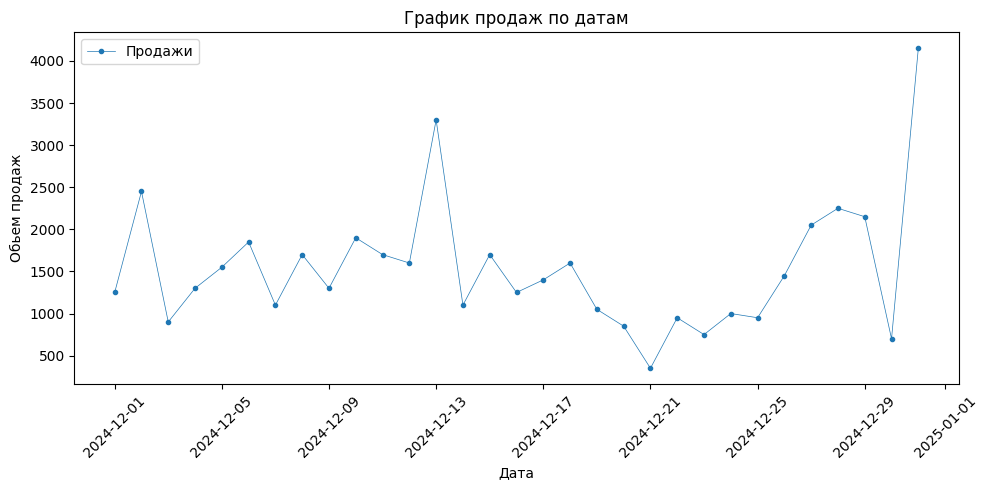

In [168]:
# замена пропущенных значений sales на среднее
df['sales'] = df['sales'].fillna(df['sales'].mean())

# суммируем значения продаж всех регионов для каждой даты
df_plot = df.groupby('date')['sales'].sum().reset_index()

# Построение графика продаж по датам
plt.figure(figsize=(10, 5))
plt.plot(df_plot['date'], df_plot['sales'], marker='.', linestyle='-', label='Продажи', linewidth=0.5)
plt.xlabel('Дата')
plt.ylabel('Обьем продаж')
plt.title('График продаж по датам')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Задание 4: Получение данных из API

Цель: Проверить способность работать с веб-данными.

Задание:

- Используйте открытое API (например, https://jsonplaceholder.typicode.com/users).
- Загрузите данные и создайте DataFrame с полями: 
    - id, 
    - name, 
    - email, 
    - company_name.

Выведите таблицу с пользователями, работающими в компаниях, название которых содержит слово "Group".

Ожидаемый ответ:

- DataFrame с результатами фильтрации.

In [169]:
# получение данных
response = requests.get("https://jsonplaceholder.typicode.com/users")
if response.status_code != 200:
    print("Не удалось загрузить данные.")
    raise KeyboardInterrupt
    
# создание датафрейма
df = pd.DataFrame([
    {
        "id": user["id"],
        "name": user["name"],
        "email": user["email"],
        "company_name": user["company"]["name"]
    } for user in response.json()
])
# выбор пользователей, компании которых содержат слово "Group".
filtered_users = df[df['company_name'].str.contains("Group", case=False)]

display(filtered_users)

,id,name,email,company_name
6,7,Kurtis Weissnat,Telly.Hoeger@billy.biz,Johns Group
7,8,Nicholas Runolfsdottir V,Sherwood@rosamond.me,Abernathy Group
